In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os
import cv2

%matplotlib inline 

In [2]:
df_all = pd.read_pickle(os.path.join(os.getcwd(), 'input\LSWMD.pkl'))
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
waferMap          811457 non-null object
dieSize           811457 non-null float64
lotName           811457 non-null object
waferIndex        811457 non-null float64
trianTestLabel    811457 non-null object
failureType       811457 non-null object
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [3]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
waferMap          811457 non-null object
dieSize           811457 non-null float64
lotName           811457 non-null object
waferIndex        811457 non-null float64
trianTestLabel    811457 non-null object
failureType       811457 non-null object
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [4]:
df_all.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [5]:
df_all.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


## Добавим разметку паттернов и их количество для каждой вафли 

In [6]:
df_all['failureNum'] = df_all.failureType
df_all['trainTestNum'] = df_all.trianTestLabel

mapping_type={'Center':0,'Donut':1,'Edge-Loc':2,
              'Edge-Ring':3,'Loc':4,'Random':5,
              'Scratch':6,'Near-full':7,'none':8}

mapping_traintest = {'Training':0, 'Test':1}

df_all = df_all.replace({'failureNum':mapping_type, 'trainTestNum':mapping_traintest})

C:\Users\user\Anaconda3\envs\neuralnets\lib\site-packages\pandas\core\internals.py:5152: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = op(a, b)
C:\Users\user\Anaconda3\envs\neuralnets\lib\site-packages\pandas\core\missing.py:51: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


## Разделим датасет

In [7]:
df_withlabel = df_all[(df_all['failureNum'] >= 0) & df_all['failureNum'] <=8]
df_withlabel = df_withlabel.reset_index()

df_withpattern = df_all[(df_all['failureNum'] >= 0) & (df_all['failureNum'] <= 7)]
df_withpattern = df_withpattern.reset_index()

df_nopattern = df_all[(df_all['failureNum'] == 8)]

df_withlabel.shape, df_withpattern.shape, df_nopattern.shape

((811457, 9), (25519, 9), (147431, 8))

## Посмотрим на статистику данных

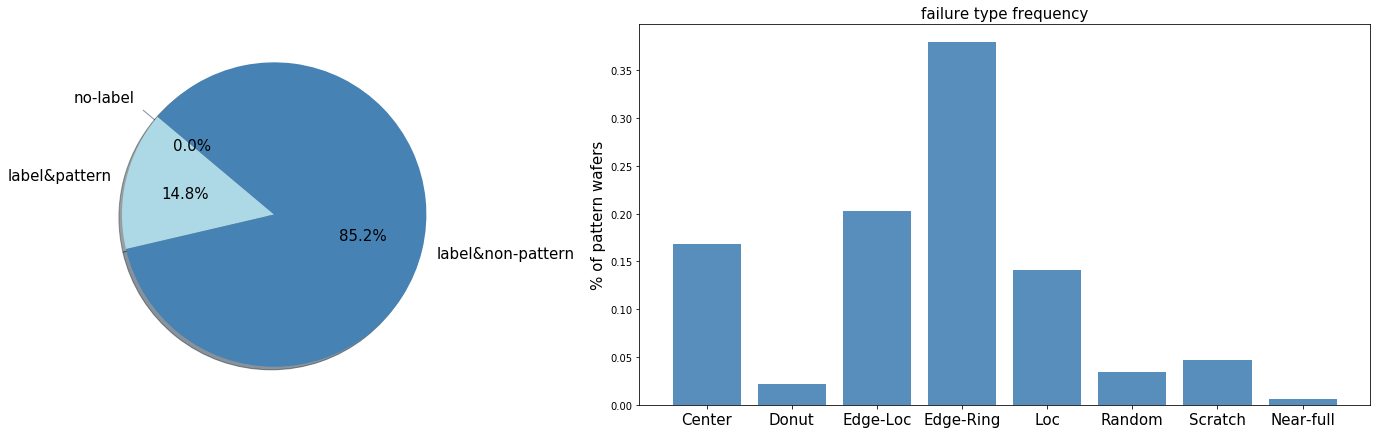

In [8]:
from matplotlib import gridspec

fig = plt.figure(figsize=(24, 7)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.5]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

no_wafers=[df_all.shape[0] - df_withlabel.shape[0], 
           df_withpattern.shape[0], df_nopattern.shape[0]]

colors = ['royalblue', 'lightblue', 'steelblue']
explode = (0.1, 0, 0)
labels = ['no-label','label&pattern','label&non-pattern']
ax1.pie(no_wafers, explode=explode, 
        labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=140,
       textprops={'fontsize': 15})

uni_pattern=np.unique(df_withpattern.failureNum, return_counts=True)
labels2 = ['','Center','Donut',
           'Edge-Loc','Edge-Ring','Loc',
           'Random','Scratch','Near-full']

ax2.bar(uni_pattern[0], uni_pattern[1] / df_withpattern.shape[0],
            color='steelblue', align='center', alpha=0.9)
ax2.set_title("failure type frequency", fontsize=15)
ax2.set_ylabel("% of pattern wafers", fontsize=15)
ax2.set_xticklabels(labels2, fontsize=15)

plt.show();

## Нарисуем вафли 

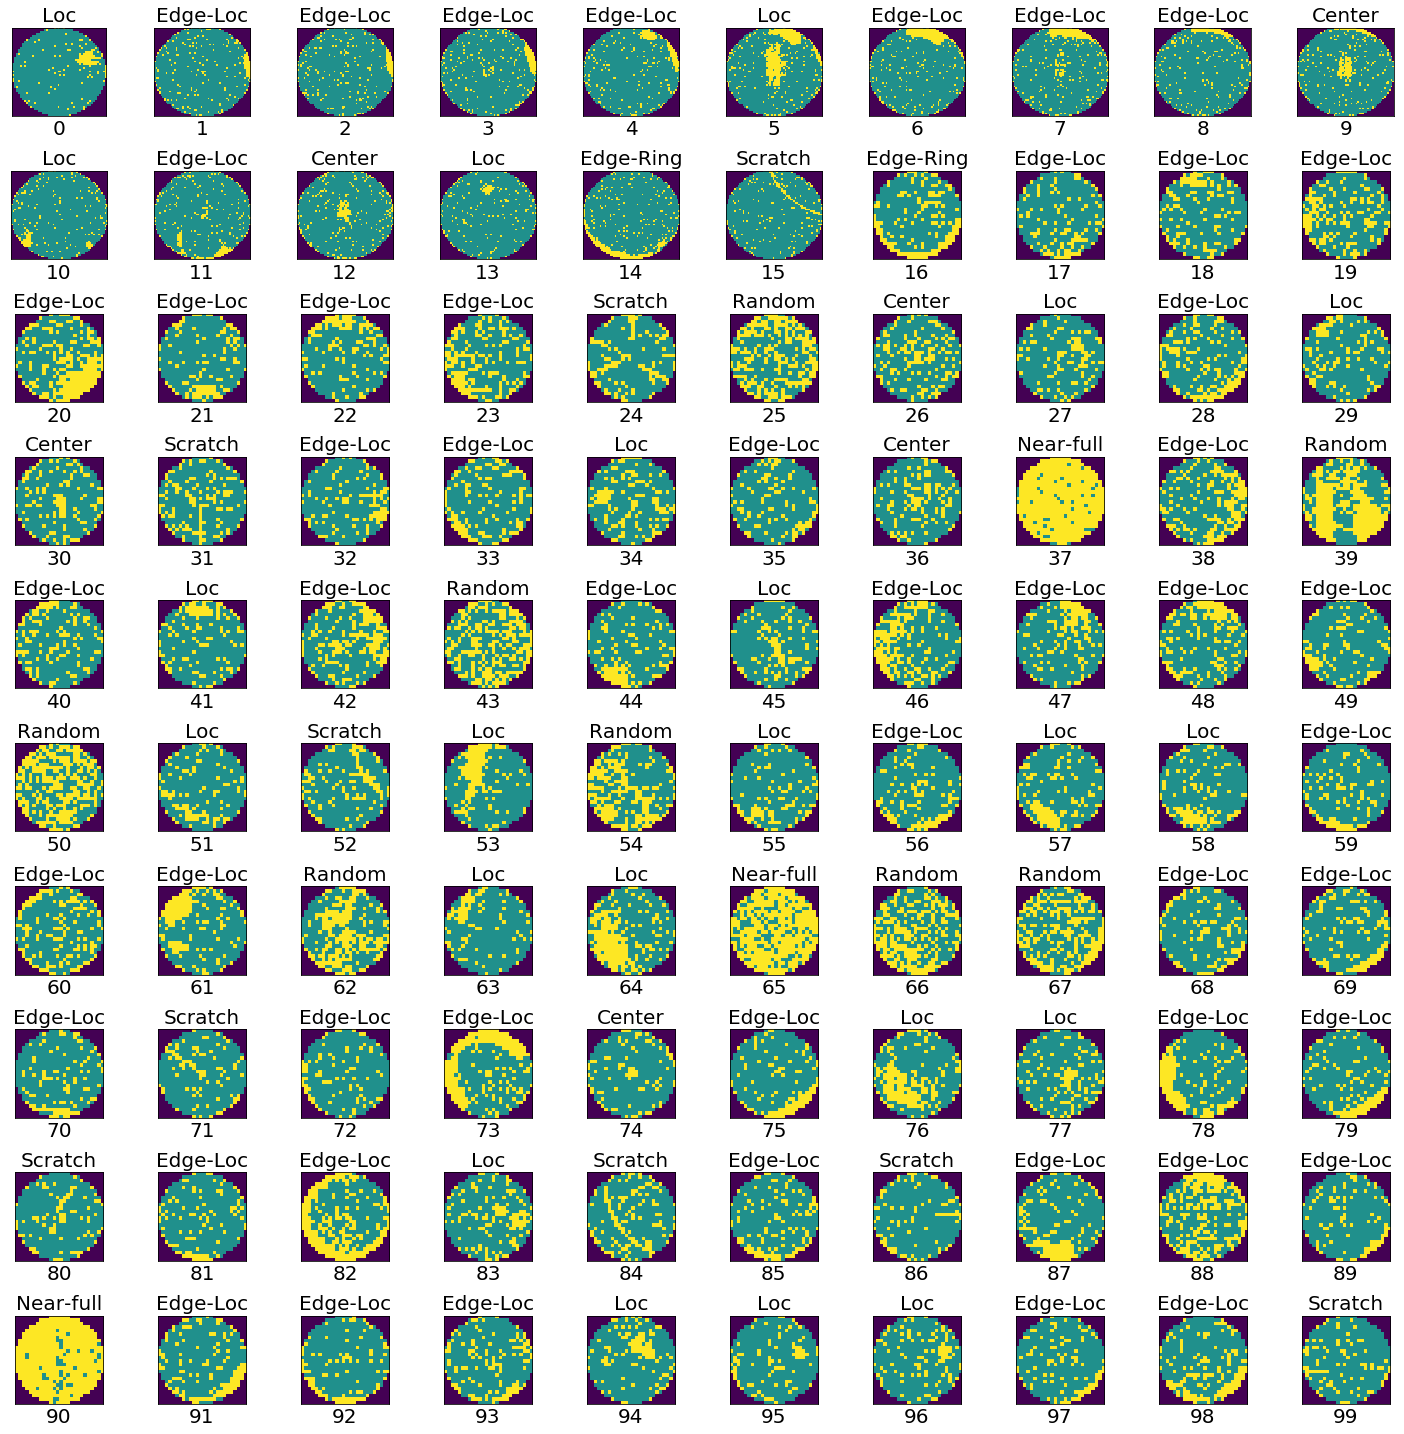

In [9]:
fig, ax = plt.subplots(nrows = 10, ncols = 10, figsize=(20, 20))
ax = ax.ravel(order='C')
for i in range(100):
    img = df_withpattern.waferMap[i]
    ax[i].imshow(img)
    ax[i].set_title(df_withpattern.failureType[i][0][0], fontsize=20)
    ax[i].set_xlabel(df_withpattern.index[i], fontsize=20)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    
plt.tight_layout()
plt.show() 

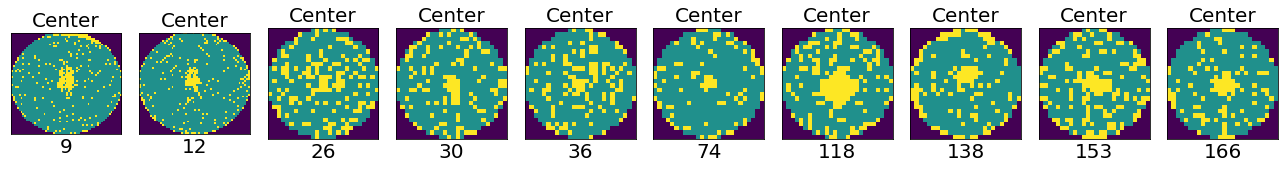

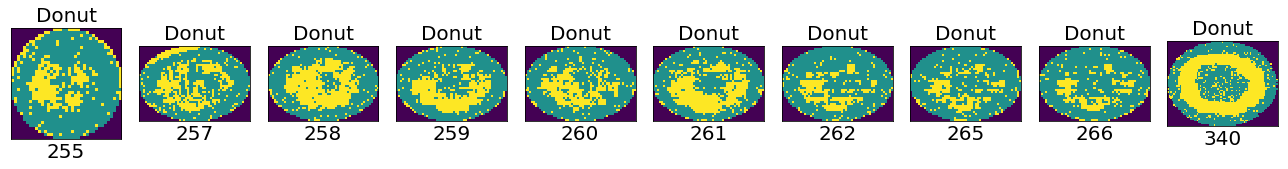

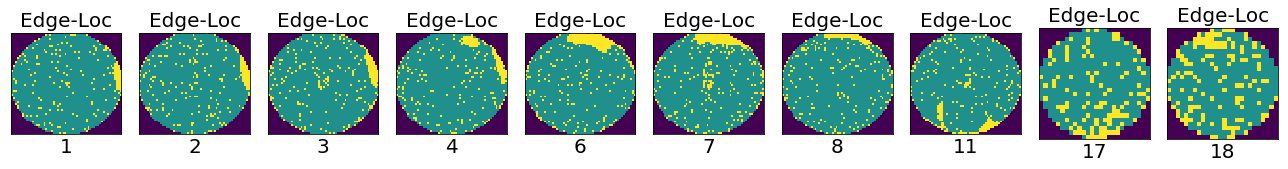

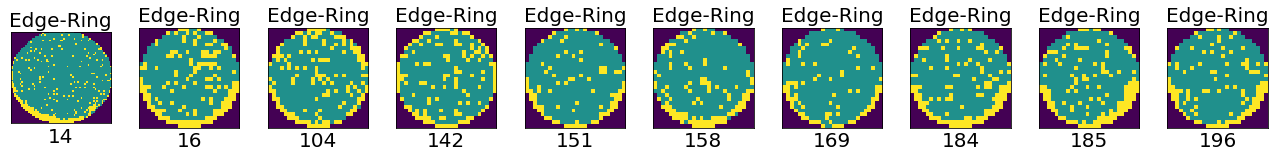

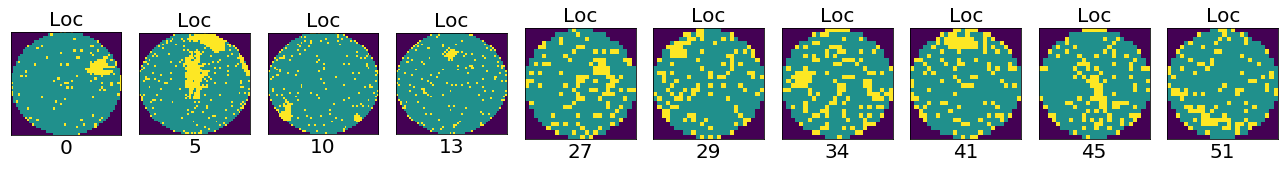

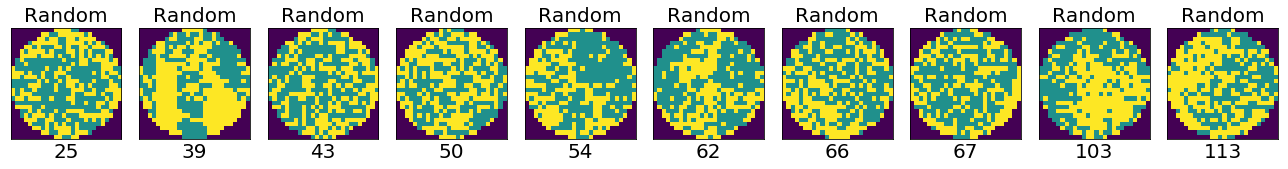

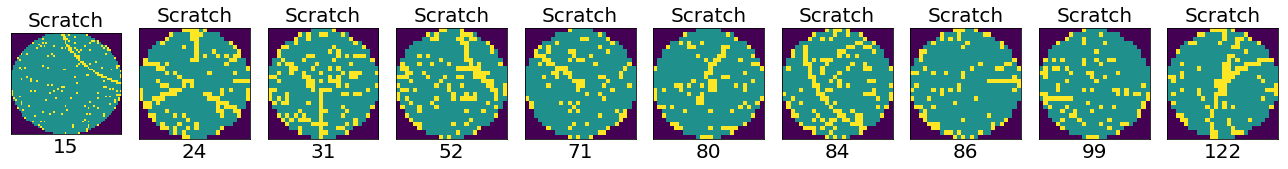

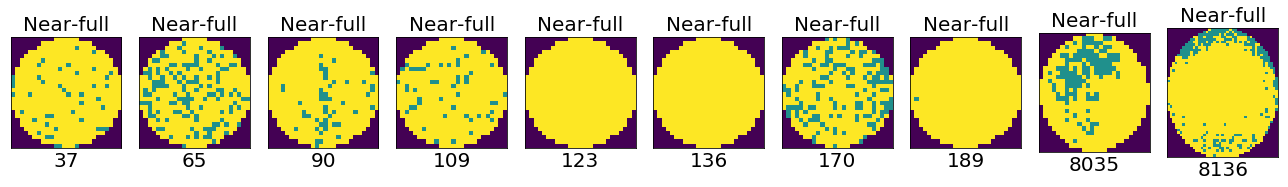

In [10]:
x = [0,1,2,3,4,5,6,7]
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

for k in x:
    fig, ax = plt.subplots(nrows = 1, ncols = 10, figsize=(18, 12))
    ax = ax.ravel(order='C')
    for j in [k]:
        img = df_withpattern.waferMap[df_withpattern.failureType==labels2[j]]
        for i in range(10):
            ax[i].imshow(img[img.index[i]])
            ax[i].set_title(df_withpattern.failureType[img.index[i]][0][0], fontsize=20)
            ax[i].set_xlabel(df_withpattern.index[img.index[i]], fontsize=20)
            ax[i].set_xticks([])
            ax[i].set_yticks([])
    plt.tight_layout()
    plt.show() 

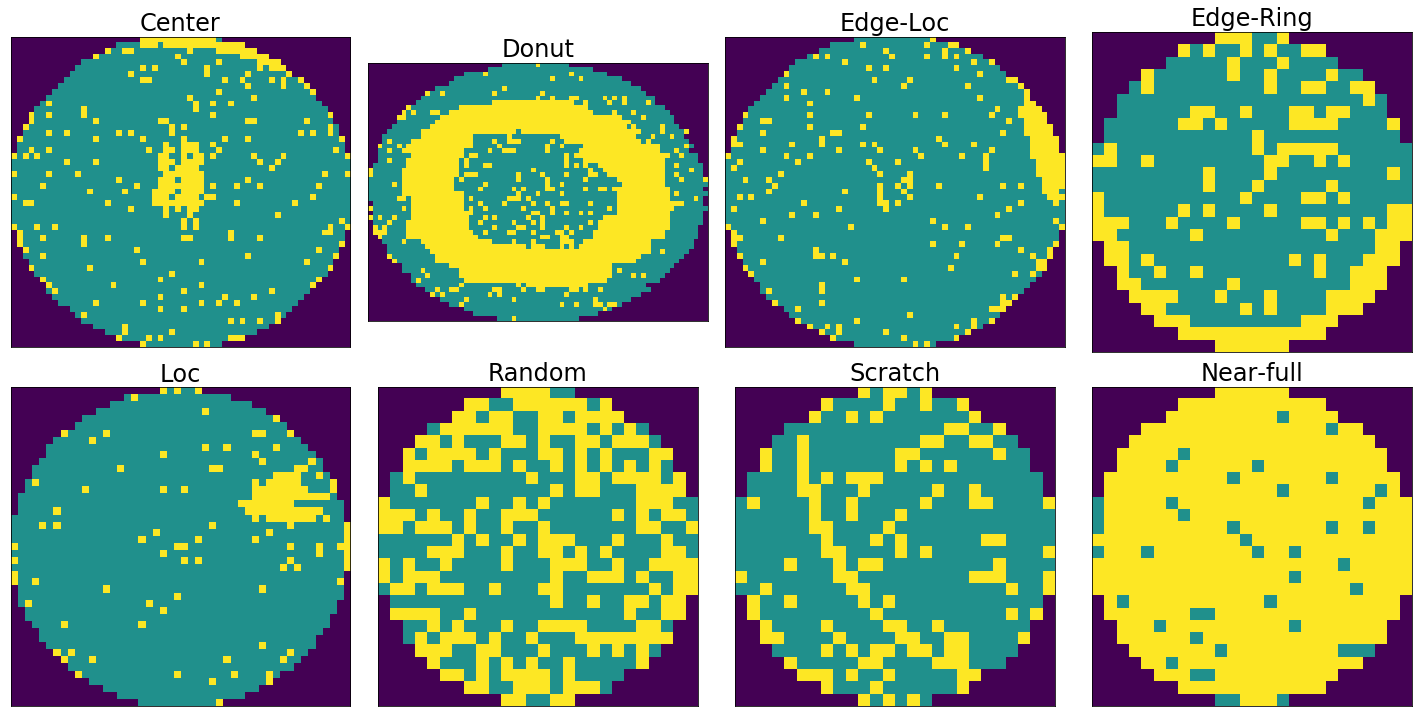

In [11]:
x = [9,340, 3, 16, 0, 25, 84, 37]

fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(20, 10))
ax = ax.ravel(order='C')
for i in range(8):
    img = df_withpattern.waferMap[x[i]]
    ax[i].imshow(img)
    ax[i].set_title(df_withpattern.failureType[x[i]][0][0],fontsize=24)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show() 

In [12]:
df_withpattern.waferMap[1].shape
df_withpattern.failureNum[1]

2

## Модель 

In [13]:
import matplotlib
matplotlib.use("Agg")
 
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import argparse
import random
import pickle
import cv2
import os
from keras.utils import np_utils
import gc 

import pandas as pd 
import matplotlib.pyplot as plt 
import os
import cv2

%matplotlib inline 

Using TensorFlow backend.


In [14]:
EPOCHS = 100
INIT_LR = 1e-3
IMAGE_DIMS = (52 , 52 , 1)
BATCH_SIZE = 720

## Reshape всех карт

## Загрузить синтетическую базу и смешать с реальными

In [15]:
%%time
df = pd.read_pickle('output/syntesis_df')
df['failureType'] = df['failureType'].map(lambda label: [[label]])

df_withpattern['waferMap'] =df_withpattern['waferMap'].map(lambda waf_map: 
                                    cv2.resize(waf_map, 
                                               dsize=(IMAGE_DIMS[0], IMAGE_DIMS[1]), 
                                               interpolation=cv2.INTER_NEAREST)) 

real_center = df_withpattern[df_withpattern['failureType'] == 'Center'].iloc[:100]
real_ring = df_withpattern[df_withpattern['failureType'] == 'Donut'].iloc[:50]
real_edge_loc = df_withpattern[df_withpattern['failureType'] == 'Edge-Loc'].iloc[:500]
real_edge_ring = df_withpattern[df_withpattern['failureType'] == 'Edge-Ring'].iloc[:500]
real_loc = df_withpattern[df_withpattern['failureType'] == 'Loc'].iloc[:350]
real_random = df_withpattern[df_withpattern['failureType'] == 'Random'].iloc[:80]
real_scratch = df_withpattern[df_withpattern['failureType'] == 'Scratch'].iloc[:100]
real_near_full = df_withpattern[df_withpattern['failureType'] == 'Near-full'].iloc[:10]

df = pd.concat([df, real_center, real_ring, real_edge_loc,
               real_edge_ring, real_loc, real_random, 
               real_scratch, real_near_full], sort=False)
gc.collect()
print(df.shape)

(17690, 9)
Wall time: 530 ms


In [16]:
real_center = df_withpattern[df_withpattern['failureType'] == 'Center'].iloc[100:]
real_ring = df_withpattern[df_withpattern['failureType'] == 'Donut'].iloc[50:]
real_edge_loc = df_withpattern[df_withpattern['failureType'] == 'Edge-Loc'].iloc[700:]
real_edge_ring = df_withpattern[df_withpattern['failureType'] == 'Edge-Ring'].iloc[500:]
real_loc = df_withpattern[df_withpattern['failureType'] == 'Loc'].iloc[400:]
real_random = df_withpattern[df_withpattern['failureType'] == 'Random'].iloc[80:]
real_scratch = df_withpattern[df_withpattern['failureType'] == 'Scratch'].iloc[150:]
real_near_full = df_withpattern[df_withpattern['failureType'] == 'Near-full'].iloc[10:]

real_test = pd.concat([real_center, real_ring, real_edge_loc,
                       real_edge_ring, real_loc, real_random, 
                       real_scratch, real_near_full], sort=False)

real_test.shape

(23529, 9)

## Генератор изображений категорий 

In [17]:
def make_image_gen_cat(in_df, batch_size=BATCH_SIZE):
    all_batches = in_df.sample(frac=1)
    out_map = []
    out_class = []
    while True:
        for index, row in in_df.iterrows():
            out_map += [np.expand_dims(row.waferMap, -1)]
            out_class += [row.failureNum]
            if len(out_map) >= batch_size:
                out_map = np.array(out_map)
                out_map = out_map.reshape(out_map.shape[0], IMAGE_DIMS[0], IMAGE_DIMS[1], 1)
                yield np.stack(out_map, 0), np.array(np_utils.to_categorical(out_class, num_classes=8))
                out_map = []
                out_class = []

## Генератор изображений MultiLabel

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer
labels = [None] * df.shape[0]

i = 0
for index, row in df.iterrows():
    label = row.failureType[0]
    labels[i] = label
    i += 1

mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)
print(labels.shape)

print("class labels:")
for (i, label) in enumerate(mlb.classes_):
    print("{}. {}".format(i + 1, label))

(17690, 8)
class labels:
1. Center
2. Donut
3. Edge-Loc
4. Edge-Ring
5. Loc
6. Near-full
7. Random
8. Scratch


In [19]:
def make_image_gen_mul(in_df, batch_size=BATCH_SIZE):
    all_batches = in_df.sample(frac=1)
    out_map = []
    out_class = []
    while True:
        for index, row in in_df.iterrows():
            out_map += [np.expand_dims(row.waferMap, -1)]
            out_class += [row.failureType[0]]
            if len(out_map) >= batch_size:
                out_map = np.array(out_map)
                out_map = out_map.reshape(out_map.shape[0], IMAGE_DIMS[0], IMAGE_DIMS[1], 1)
                yield np.stack(out_map, 0), mlb.transform(out_class)
                out_map = []
                out_class = []

## Разделим датасет на train/valid

In [20]:
from sklearn.model_selection import train_test_split

train_df, valid_df = train_test_split(df, test_size=0.2)
train_df.shape[0], valid_df.shape[0]

(14152, 3538)

## Разделим датасет на train/valid/test

In [21]:
train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
train.shape[0], validate.shape[0], test.shape[0]

(10614, 3538, 3538)

#### Проверка 

In [22]:
%%time
valid_x, valid_y = next(make_image_gen_mul(validate))
print(valid_x.shape, valid_y.shape)

(720, 52, 52, 1) (720, 8)
Wall time: 54.9 ms


## Аугментация

In [23]:
from keras.preprocessing.image import ImageDataGenerator

dg_args = dict(featurewise_center = False, 
                  samplewise_center = False,
                  rotation_range = 15,  
                  horizontal_flip = True, 
                  vertical_flip = True)

image_gen = ImageDataGenerator(**dg_args)
label_gen = ImageDataGenerator()

def create_aug_gen(in_gen, seed = None):
    np.random.seed(seed if seed is not None else np.random.choice(range(9999)))
    for in_x, in_y in in_gen:
        # keep the seeds syncronized otherwise the augmentation 
        # to the images is different from the masks
        g_x = image_gen.flow(in_x, 
                             batch_size = in_x.shape[0])

        yield next(g_x), in_y

In [24]:
train_gen = make_image_gen_mul(train)
train_x, train_y = next(train_gen)
print('x', train_x.shape)
print('y', train_y.shape)
cur_gen = create_aug_gen(train_gen)
t_x, t_y = next(cur_gen)

gc.collect()

x (720, 52, 52, 1)
y (720, 8)


0

[1 0 0 0 0 0 0 0]


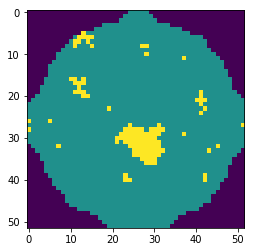

In [25]:
n = 16
plt.imshow(valid_x[n,:,:,0])
print(valid_y[n])

## Строим модель 

In [26]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from keras.utils import np_utils

### VGG-16 

In [27]:
class SmallerVGGNet:
    @staticmethod
    def build(width, height, depth, classes, finalAct="softmax"):
        # initialize the model along with the input shape to be
        # "channels last" and the channels dimension itself
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        # if we are using "channels first", update the input shape
        # and channels dimension
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # CONV => RELU => POOL
        model.add(Conv2D(32, (3, 3), padding="same", 
                         input_shape=(IMAGE_DIMS[0], IMAGE_DIMS[1], 1)))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        # (CONV => RELU) * 2 => POOL
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # (CONV => RELU) * 2 => POOL
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        
        # (CONV => RELU) * 2 => POOL
        model.add(Conv2D(256, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Conv2D(256, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(1024))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

        # use a *softmax* activation for single-label classification
        # and *sigmoid* activation for multi-label classification
        model.add(Dense(classes))
        model.add(Activation(finalAct))

        # return the constructed network architecture
        return model


In [28]:
model = SmallerVGGNet.build(width=IMAGE_DIMS[1], height=IMAGE_DIMS[0],
                            depth=IMAGE_DIMS[2], classes=8, 
                            finalAct="sigmoid")
 
# initialize the optimizer
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 52, 52, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 52, 52, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 52, 52, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 64)        0         
__________

In [30]:
from keras.callbacks import Callback
class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        
    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, dice_coef, acc, _ = self.model.evaluate(x, y, verbose=0)
        print('\n - Testing loss: {:.4f} - dice_coef: {:.4f} - acc: {:.4f}\n'.format(loss, dice_coef, acc))

In [31]:
import keras.backend as K
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

weight_path="C:\\Users\\user\\Python_Code\\Data Monsters\\output\\models\\VGG16_easy_weights.h5"

checkpoint = ModelCheckpoint(weight_path, monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only=True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_acc', factor=0.33,
                                   patience=3, verbose=1, mode='max',
                                   min_delta=0.0001, cooldown=0, min_lr=1e-6)

early = EarlyStopping(monitor="val_acc", mode="max", verbose=2, 
                      patience=7)



callbacks_list = [checkpoint, reduceLROnPlat]

gc.collect()

2206

## Reset model

In [32]:
from keras import metrics
from keras import backend as K

model.compile(optimizer=Adam(1e-3, decay=1e-6), 
              loss="categorical_crossentropy",
              metrics=["accuracy", 
                      metrics.categorical_accuracy])

def reset_weights(model):
    session = K.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)
            
reset_weights(model)

## main train

In [33]:
gen_train_cat = make_image_gen_cat(train)
gen_valid_cat = make_image_gen_cat(validate)

aug_gen_cat = create_aug_gen(make_image_gen_mul(train))


net = model.fit_generator(gen_train_cat,
                          steps_per_epoch = 100,
                          epochs = EPOCHS,
                          validation_data = gen_valid_cat,
                          validation_steps = 320,
                          callbacks = callbacks_list,
                          verbose = 1)

Epoch 1/100
100/100 [==============================] - 57s 571ms/step - loss: 0.7047 - acc: 0.4927 - categorical_accuracy: 0.4927 - val_loss: 0.5767 - val_acc: 0.4850 - val_categorical_accuracy: 0.4850

Epoch 00001: val_acc improved from -inf to 0.48502, saving model to C:\Users\user\Python_Code\Data Monsters\output\models\VGG16_easy_weights.h5
Epoch 2/100
100/100 [==============================] - 53s 526ms/step - loss: 0.3631 - acc: 0.5649 - categorical_accuracy: 0.5649 - val_loss: 0.3198 - val_acc: 0.6139 - val_categorical_accuracy: 0.6139

Epoch 00002: val_acc improved from 0.48502 to 0.61393, saving model to C:\Users\user\Python_Code\Data Monsters\output\models\VGG16_easy_weights.h5
Epoch 3/100
100/100 [==============================] - 52s 524ms/step - loss: 0.2870 - acc: 0.6249 - categorical_accuracy: 0.6249 - val_loss: 0.3084 - val_acc: 0.6269 - val_categorical_accuracy: 0.6269

Epoch 00003: val_acc improved from 0.61393 to 0.62695, saving model to C:\Users\user\Python_Code\Dat

100/100 [==============================] - 59s 587ms/step - loss: 2.9050e-04 - acc: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0605 - val_acc: 0.9901 - val_categorical_accuracy: 0.9901

Epoch 00027: val_acc improved from 0.98956 to 0.99012, saving model to C:\Users\user\Python_Code\Data Monsters\output\models\VGG16_easy_weights.h5
Epoch 28/100
100/100 [==============================] - 59s 591ms/step - loss: 1.5367e-04 - acc: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0623 - val_acc: 0.9898 - val_categorical_accuracy: 0.9898

Epoch 00028: val_acc did not improve from 0.99012
Epoch 29/100
100/100 [==============================] - 58s 585ms/step - loss: 1.7374e-04 - acc: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0638 - val_acc: 0.9893 - val_categorical_accuracy: 0.9893

Epoch 00029: val_acc did not improve from 0.99012
Epoch 30/100
100/100 [==============================] - 58s 585ms/step - loss: 1.9125e-04 - acc: 1.0000 - categorical_accuracy: 1.0000 - val_l

100/100 [==============================] - 58s 585ms/step - loss: 3.7800e-05 - acc: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0665 - val_acc: 0.9901 - val_categorical_accuracy: 0.9901

Epoch 00056: val_acc did not improve from 0.99068
Epoch 57/100
100/100 [==============================] - 59s 587ms/step - loss: 1.3770e-04 - acc: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0663 - val_acc: 0.9904 - val_categorical_accuracy: 0.9904

Epoch 00057: val_acc did not improve from 0.99068
Epoch 58/100
100/100 [==============================] - 59s 587ms/step - loss: 4.0358e-05 - acc: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0664 - val_acc: 0.9904 - val_categorical_accuracy: 0.9904

Epoch 00058: val_acc did not improve from 0.99068
Epoch 59/100
100/100 [==============================] - 59s 585ms/step - loss: 4.5170e-05 - acc: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0663 - val_acc: 0.9904 - val_categorical_accuracy: 0.9904

Epoch 00059: val_acc did not im

100/100 [==============================] - 59s 590ms/step - loss: 4.9115e-05 - acc: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0658 - val_acc: 0.9904 - val_categorical_accuracy: 0.9904

Epoch 00088: val_acc did not improve from 0.99068
Epoch 89/100
100/100 [==============================] - 59s 590ms/step - loss: 3.8717e-05 - acc: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0660 - val_acc: 0.9904 - val_categorical_accuracy: 0.9904

Epoch 00089: val_acc did not improve from 0.99068
Epoch 90/100
100/100 [==============================] - 59s 592ms/step - loss: 3.5211e-05 - acc: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0658 - val_acc: 0.9904 - val_categorical_accuracy: 0.9904

Epoch 00090: val_acc did not improve from 0.99068
Epoch 91/100
100/100 [==============================] - 59s 591ms/step - loss: 5.4131e-05 - acc: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0658 - val_acc: 0.9904 - val_categorical_accuracy: 0.9904

Epoch 00091: val_acc did not im

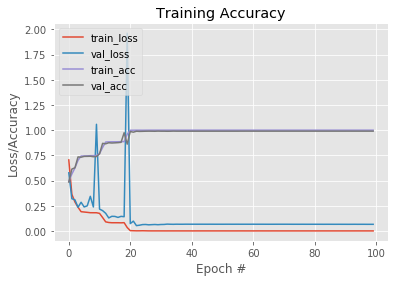

In [34]:
# plot the training loss
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), net.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), net.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
# plot the trainingaccuracy
plt.plot(np.arange(0, N), net.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), net.history["val_acc"], label="val_acc")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left");

## fine tune

In [56]:
for layer in model.layers[:20]:
    layer.trainable = False

model.compile(optimizer=Adam(1e-4, decay=1e-6), 
              loss="categorical_crossentropy",
              metrics=["accuracy", 
                      metrics.categorical_accuracy])

net = model.fit_generator(gen_train_cat,
                          steps_per_epoch = 100,
                          epochs = 20,
                          validation_data = gen_valid_cat,
                          validation_steps = 320,
                          callbacks = callbacks_list,
                          verbose = 1)

Epoch 1/20
100/100 [==============================] - 43s 430ms/step - loss: 7.0441e-05 - acc: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0634 - val_acc: 0.9909 - val_categorical_accuracy: 0.9909

Epoch 00001: val_acc improved from 0.99068 to 0.99095, saving model to C:\Users\user\Python_Code\Data Monsters\output\models\VGG16_easy_weights.h5
Epoch 2/20
100/100 [==============================] - 43s 430ms/step - loss: 3.4285e-05 - acc: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0622 - val_acc: 0.9912 - val_categorical_accuracy: 0.9912

Epoch 00002: val_acc improved from 0.99095 to 0.99125, saving model to C:\Users\user\Python_Code\Data Monsters\output\models\VGG16_easy_weights.h5
Epoch 3/20
100/100 [==============================] - 42s 420ms/step - loss: 3.9709e-05 - acc: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0664 - val_acc: 0.9907 - val_categorical_accuracy: 0.9907

Epoch 00003: val_acc did not improve from 0.99125
Epoch 4/20
100/100 [==================

In [36]:
for layer in model.layers:
    layer.trainable = True

gen_train_mul = make_image_gen_mul(train)
gen_valid_mul = make_image_gen_mul(validate)

aug_gen_mul = create_aug_gen(make_image_gen_mul(train))

model.compile(optimizer=Adam(1e-4, decay=1e-6), 
              loss="categorical_crossentropy",
              metrics=["accuracy", 
                      metrics.categorical_accuracy])

net = model.fit_generator(gen_train_mul,
                          steps_per_epoch = 100,
                          epochs = EPOCHS,
                          validation_data = gen_valid_mul,
                          validation_steps = 320,
                          callbacks = callbacks_list,
                          verbose = 1)

Epoch 1/100
100/100 [==============================] - 63s 629ms/step - loss: 4.8904 - acc: 0.6469 - categorical_accuracy: 0.6469 - val_loss: 2.9261 - val_acc: 0.7524 - val_categorical_accuracy: 0.7524

Epoch 00001: val_acc did not improve from 0.99068
Epoch 2/100
100/100 [==============================] - 62s 620ms/step - loss: 3.7743 - acc: 0.6499 - categorical_accuracy: 0.6499 - val_loss: 2.2594 - val_acc: 0.7663 - val_categorical_accuracy: 0.7663

Epoch 00002: val_acc did not improve from 0.99068
Epoch 3/100
100/100 [==============================] - 62s 624ms/step - loss: 2.6002 - acc: 0.6705 - categorical_accuracy: 0.6705 - val_loss: 1.6617 - val_acc: 0.7877 - val_categorical_accuracy: 0.7877

Epoch 00003: val_acc did not improve from 0.99068
Epoch 4/100
100/100 [==============================] - 62s 618ms/step - loss: 1.7841 - acc: 0.7082 - categorical_accuracy: 0.7082 - val_loss: 1.2081 - val_acc: 0.8174 - val_categorical_accuracy: 0.8174

Epoch 00004: val_acc did not improve f

100/100 [==============================] - 62s 622ms/step - loss: 0.0823 - acc: 0.9817 - categorical_accuracy: 0.9817 - val_loss: 0.1263 - val_acc: 0.9774 - val_categorical_accuracy: 0.9774

Epoch 00033: val_acc did not improve from 0.99068
Epoch 34/100
100/100 [==============================] - 62s 621ms/step - loss: 0.0786 - acc: 0.9827 - categorical_accuracy: 0.9827 - val_loss: 0.1252 - val_acc: 0.9774 - val_categorical_accuracy: 0.9774

Epoch 00034: val_acc did not improve from 0.99068
Epoch 35/100
100/100 [==============================] - 62s 619ms/step - loss: 0.0772 - acc: 0.9835 - categorical_accuracy: 0.9835 - val_loss: 0.1236 - val_acc: 0.9771 - val_categorical_accuracy: 0.9771

Epoch 00035: val_acc did not improve from 0.99068
Epoch 36/100
100/100 [==============================] - 62s 617ms/step - loss: 0.0733 - acc: 0.9840 - categorical_accuracy: 0.9840 - val_loss: 0.1224 - val_acc: 0.9774 - val_categorical_accuracy: 0.9774

Epoch 00036: val_acc did not improve from 0.990

100/100 [==============================] - 62s 620ms/step - loss: 0.0268 - acc: 0.9923 - categorical_accuracy: 0.9923 - val_loss: 0.0830 - val_acc: 0.9828 - val_categorical_accuracy: 0.9828

Epoch 00065: val_acc did not improve from 0.99068
Epoch 66/100
100/100 [==============================] - 62s 618ms/step - loss: 0.0264 - acc: 0.9923 - categorical_accuracy: 0.9923 - val_loss: 0.0821 - val_acc: 0.9828 - val_categorical_accuracy: 0.9828

Epoch 00066: val_acc did not improve from 0.99068
Epoch 67/100
100/100 [==============================] - 62s 625ms/step - loss: 0.0239 - acc: 0.9927 - categorical_accuracy: 0.9927 - val_loss: 0.0813 - val_acc: 0.9828 - val_categorical_accuracy: 0.9828

Epoch 00067: val_acc did not improve from 0.99068
Epoch 68/100
100/100 [==============================] - 62s 617ms/step - loss: 0.0237 - acc: 0.9931 - categorical_accuracy: 0.9931 - val_loss: 0.0807 - val_acc: 0.9828 - val_categorical_accuracy: 0.9828

Epoch 00068: val_acc did not improve from 0.990

100/100 [==============================] - 62s 616ms/step - loss: 0.0135 - acc: 0.9945 - categorical_accuracy: 0.9945 - val_loss: 0.0702 - val_acc: 0.9853 - val_categorical_accuracy: 0.9853

Epoch 00097: val_acc did not improve from 0.99068
Epoch 98/100
100/100 [==============================] - 62s 621ms/step - loss: 0.0119 - acc: 0.9950 - categorical_accuracy: 0.9950 - val_loss: 0.0696 - val_acc: 0.9856 - val_categorical_accuracy: 0.9856

Epoch 00098: val_acc did not improve from 0.99068
Epoch 99/100
100/100 [==============================] - 62s 622ms/step - loss: 0.0121 - acc: 0.9950 - categorical_accuracy: 0.9950 - val_loss: 0.0694 - val_acc: 0.9856 - val_categorical_accuracy: 0.9856

Epoch 00099: val_acc did not improve from 0.99068
Epoch 100/100
100/100 [==============================] - 62s 618ms/step - loss: 0.0105 - acc: 0.9951 - categorical_accuracy: 0.9951 - val_loss: 0.0691 - val_acc: 0.9859 - val_categorical_accuracy: 0.9859

Epoch 00100: val_acc did not improve from 0.99

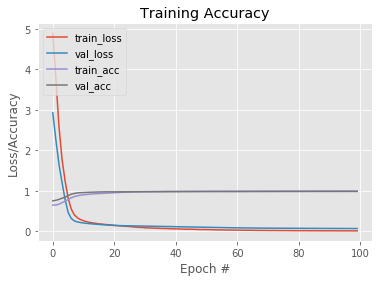

In [37]:
# plot the training loss
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), net.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), net.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
# plot the trainingaccuracy
plt.plot(np.arange(0, N), net.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), net.history["val_acc"], label="val_acc")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left");

### Сохранить модель

In [38]:
# Сохраним веса модели
model.save_weights(weight_path)

## Сравниваем предикты с ответами

In [58]:
out_map = []
out_class = []
for index, row in real_test.iterrows():
    out_map += [np.expand_dims(row.waferMap, -1)]
    out_class += [row.failureType[0]]

out_map = np.array(out_map)
out_map = out_map.reshape(out_map.shape[0], IMAGE_DIMS[0], IMAGE_DIMS[1], 1)
out_map = np.stack(out_map, 0)
out_class = mlb.transform(out_class)

In [59]:
%%time
y_test_pred = model.predict(out_map)
y_test = out_class

print(y_test_pred.shape, y_test.shape)

(23529, 8) (23529, 8)
Wall time: 5.55 s


[0 0 0 1 0 0 0 0]
Center: 0.00%
Donut: 0.00%
Edge-Loc: 0.58%
Edge-Ring: 0.00%
Loc: 0.00%
Near-full: 0.00%
Random: 0.00%
Scratch: 0.06%


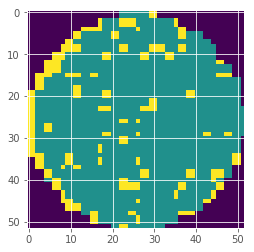

In [50]:
n = 9999
print((y_test[n]))

for (label, p) in zip(mlb.classes_, y_test_pred[n]):
    print("{}: {:.2f}%".format(label, p * 100))
    
    
plt.imshow(out_map[n][:,:,0]);

In [52]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    

Confusion matrix, without normalization
Normalized confusion matrix


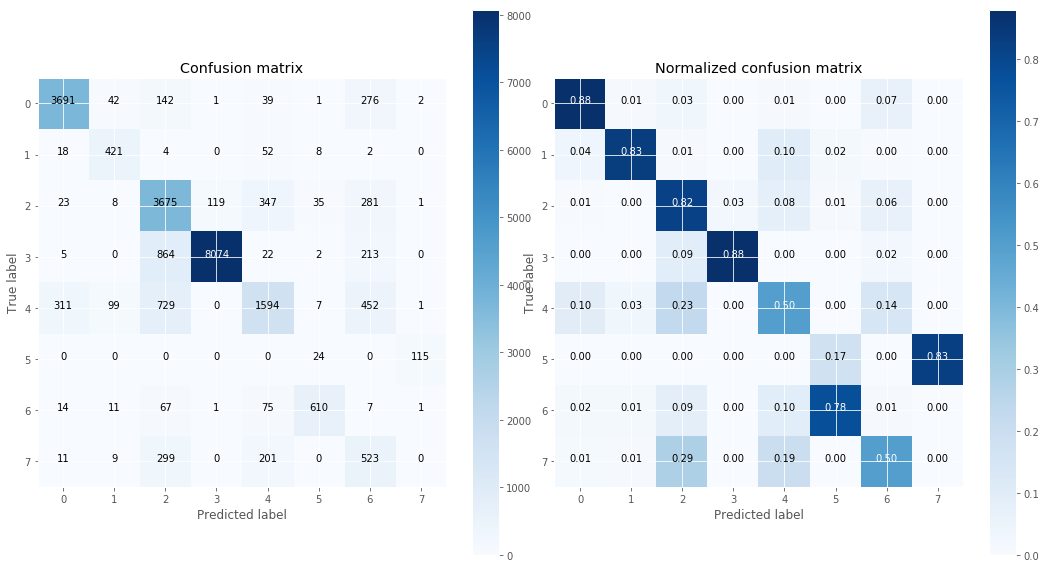

In [60]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1))
np.set_printoptions(precision=2)

from matplotlib import gridspec
fig = plt.figure(figsize=(15, 8)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1]) 

## Plot non-normalized confusion matrix
plt.subplot(gs[0])
plot_confusion_matrix(cnf_matrix, title='Confusion matrix')

# Plot normalized confusion matrix
plt.subplot(gs[1])
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix')

plt.savefig('output/mix_syntesis_6.jpg')
plt.show()

'Center':0,'Ring':1,'Edge-Loc':2,

'Edge-Ring':3,'Loc':4,'Random':5,

'Scrath':6, 'Near-Full':7, 'Curved-Scrath':8